# AutoML & TPOT
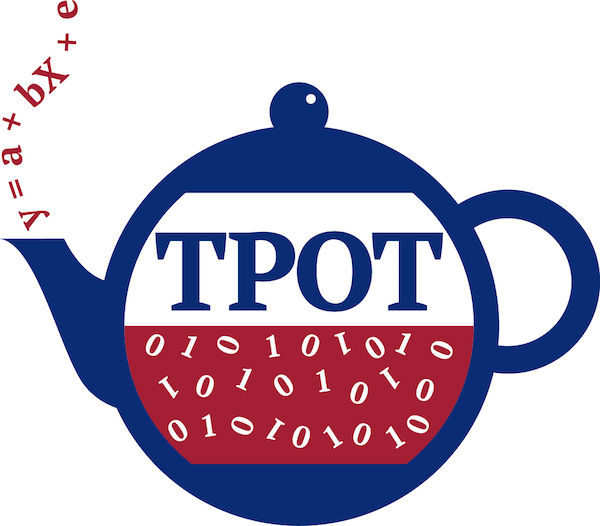

# Dependencies

In [3]:
!conda install deap update_checker tqdm stopit --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/wilsons/anaconda3/envs/pyjup

  added / updated specs: 
    - deap
    - stopit
    - tqdm
    - update_checker


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    update_checker-0.16        |             py_0           9 KB  conda-forge
    deap-1.3.0                 |   py36h86efe34_0         151 KB  conda-forge
    tqdm-4.36.1                |             py_0          43 KB  conda-forge
    stopit-1.1.2               |             py_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         218 KB

The following NEW packages will be INSTALLED:

   

In [5]:
!conda install tpot --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/wilsons/anaconda3/envs/pyjup

  added / updated specs: 
    - tpot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tpot-0.10.2                |           py36_0         112 KB  conda-forge

The following NEW packages will be INSTALLED:

    tpot: 0.10.2-py36_0 conda-forge


tpot 0.10.2: ########################################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


# Setup

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from tpot import TPOTClassifier
from tpot import TPOTRegressor

# Genetic Algorithm

## Algorithm
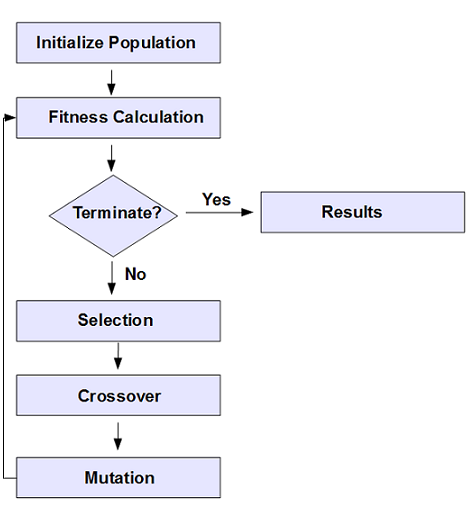

## Crossover
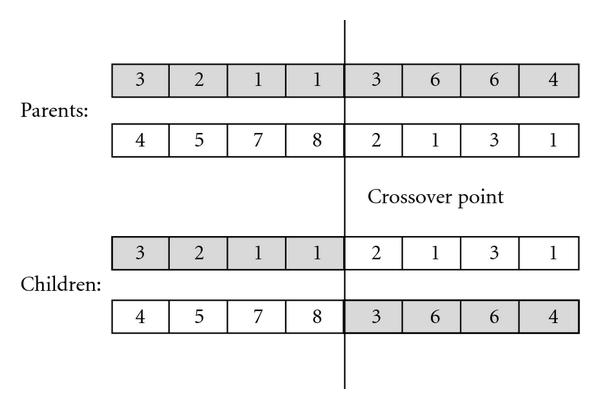

## Mutation
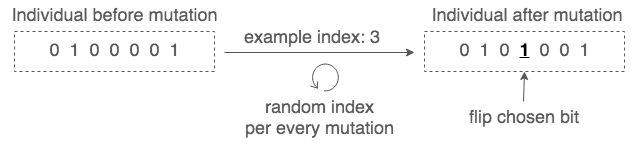

# Implementation

In [89]:
def calculate_fitness(population):
    """
    Compute the fitness / scoring function
    Implemented as the weighted sum with an array of coefficients
    """
    coefficients = [3.0, -2.0, 7.5, -10.0, 0.5, 4.4, 1.1, -0.75]
    fitness = np.sum(population * coefficients, axis=1)
    return fitness

def create_mating_pool(population, fitness, number_parents):
    """
    Find the best number_parents in population according to fitness
    """
    parents = np.empty((number_parents, population.shape[1]))
    for parent in range(number_parents):
        maximum = np.where(fitness == np.max(fitness))
        maximum = maximum[0][0]
        parents[parent, :] = population[maximum, :]
        fitness[maximum] = -999999
    return parents

def crossover(parents, number_offspring, features):
    """
    We're going to cross over parents to make offspring
    Our cross point will be halfway over feastures length
    """
    offspring = np.empty((number_offspring, features))
    cross = int(features / 2)
    for off in range(number_offspring):
        parent1 = off % parents.shape[0]
        parent2 = (off + 1) % parents.shape[0]
        offspring[off, 0:cross] = parents[parent1, 0:cross]
        offspring[off, cross:]  = parents[parent2, cross:]
    return offspring

def mutation(offspring):
    """
    Randomly select a feature to mutate
    """
    for off in range(offspring.shape[0]):
        rand = np.random.uniform(-1.0, 1.0, 1)
        mutate = np.random.randint(0, 7)
        offspring[off, mutate] = offspring[off, mutate] + rand
    return offspring

## Initialize Population
* 10 individuals in the population
* 8 features per individual

In [96]:
individuals = 10
features    = 8
pop_size = (individuals, features)
population = np.random.uniform(low=-5.0, high=5.0, size=pop_size)
pd.DataFrame(population)

,0,1,2,3,4,5,6,7
0,-0.613420,-0.703584,3.191029,-1.561249,-1.022607,4.111238,-2.533770,3.372665
1,2.751285,-1.326762,3.131188,-4.596192,-3.768705,3.306322,3.737046,2.787754
2,1.777719,-3.445176,4.420085,4.144418,2.823268,3.283392,2.377509,-1.868774
3,3.942535,-1.680603,0.157016,4.032034,4.866694,-0.552407,-3.335365,-0.273081
4,1.606835,-2.219011,4.089304,4.835124,0.929960,-2.378313,3.589280,1.362447
5,4.763776,1.695168,-4.836424,4.954210,-0.476416,-2.581111,2.790584,-2.629743
6,0.381118,-2.027936,2.619051,-3.895347,0.992193,-4.215346,4.788538,1.541180
7,-4.139164,-1.173242,-4.994473,-3.042835,3.635477,-0.981425,4.400010,3.926234
8,1.556480,-3.311557,2.092364,1.176426,-2.132523,-2.495123,4.600067,-0.616001
9,0.237731,1.824050,0.632117,2.888212,-0.194140,4.249883,2.192298,4.870985


## Initial Fitness
* Take our population and compute the original fitness

In [97]:
fitness = calculate_fitness(population)
print(pd.DataFrame(fitness))

           0
0  51.373604
1  95.036609
2  23.805368
3 -27.415241
4 -15.496159
5 -81.467434
6  49.855661
7 -17.706407
8   8.698300
9  -9.715442


## Run Generations
* For each generation we:
 * Compute the fitness
 * Pick best parents 
 * Make a number of offspring from parents using crossover
 * Randomly mutate the offspring
 * Concat the best parents and offspring
* Keep best individual and fitness eah time

In [98]:
generations = 20
mating      = 4
best_fitness = []
best_individual = []

for gen in range(generations):
    fitness = calculate_fitness(population)
    parents = create_mating_pool(population, fitness, mating)
    number_offspring = population.shape[0] - parents.shape[0]
    offspring = crossover(parents, number_offspring, features)
    offspring = mutation(offspring)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :]  = offspring
    
    best_fitness.append(max(calculate_fitness(population)))
    best_individual.extend(population[np.where(fitness == np.max(fitness))])

## Best Fitness

[95.03660947022293,
 97.42409208833692,
 107.62525240561423,
 107.62525240561423,
 107.90547744734721,
 112.49996099595691,
 114.3952714412923,
 116.80716784288921,
 117.03704714264632,
 117.41589770112711,
 122.22259799039244,
 129.6278062313257,
 130.80427440767414,
 135.3634412702304,
 139.0388251282559,
 139.0388251282559,
 140.79076779612788,
 144.67019329423263,
 145.3128331542794,
 153.28204813833668]

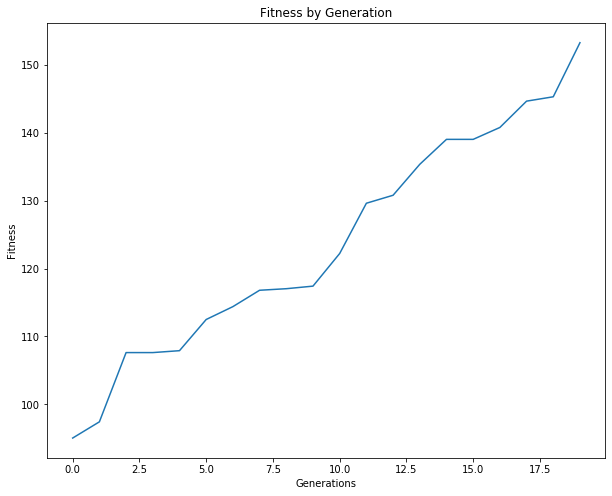

In [99]:
plt.figure(figsize=(10,8))
plt.plot(best_fitness)
plt.title('Fitness by Generation')
plt.xlabel('Generations')
plt.ylabel('Fitness')
best_fitness

## Best Offspring

In [100]:
pd.DataFrame(best_individual)

,0,1,2,3,4,5,6,7
0,2.751285,-1.326762,3.131188,-3.637124,-1.022607,4.111238,-2.533770,3.372665
1,2.751285,-1.326762,3.131188,-4.596192,-1.022607,4.411557,-2.533770,3.372665
2,2.751285,-1.326762,3.131188,-4.596192,-3.768705,3.306322,3.737046,2.787754
3,2.751285,-1.865577,3.131188,-5.276816,1.848824,2.756733,1.722025,-1.868774
4,2.751285,-1.865577,3.131188,-5.276816,1.848824,2.868279,2.377509,-1.868774
5,2.751285,-1.865577,3.131188,-5.276816,1.848824,2.756733,1.605798,-1.868774
6,3.453526,-1.865577,3.192987,-5.276816,1.848824,3.283392,2.377509,-1.868774
7,4.100472,-1.462836,3.131188,-5.276816,1.848824,3.912479,2.377509,-1.868774
8,4.100472,-1.865577,3.131188,-5.276816,1.848824,3.902133,2.377509,-1.868774
9,4.100472,-2.128632,3.131188,-5.276816,1.848824,3.902133,2.377509,-1.868774


<Figure size 720x576 with 0 Axes>

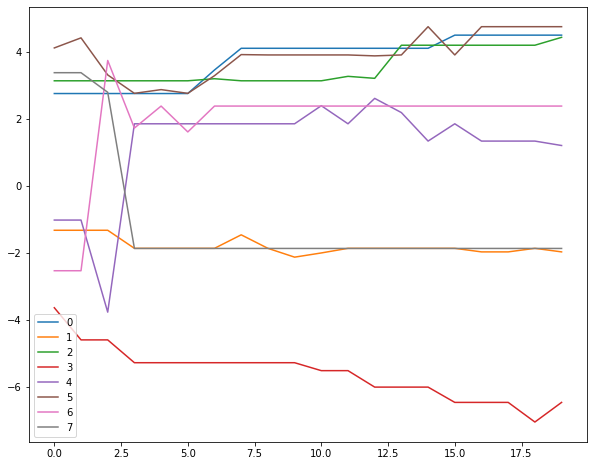

In [103]:
pd.DataFrame(best_individual).plot(figsize=(10,8))

# TPOT
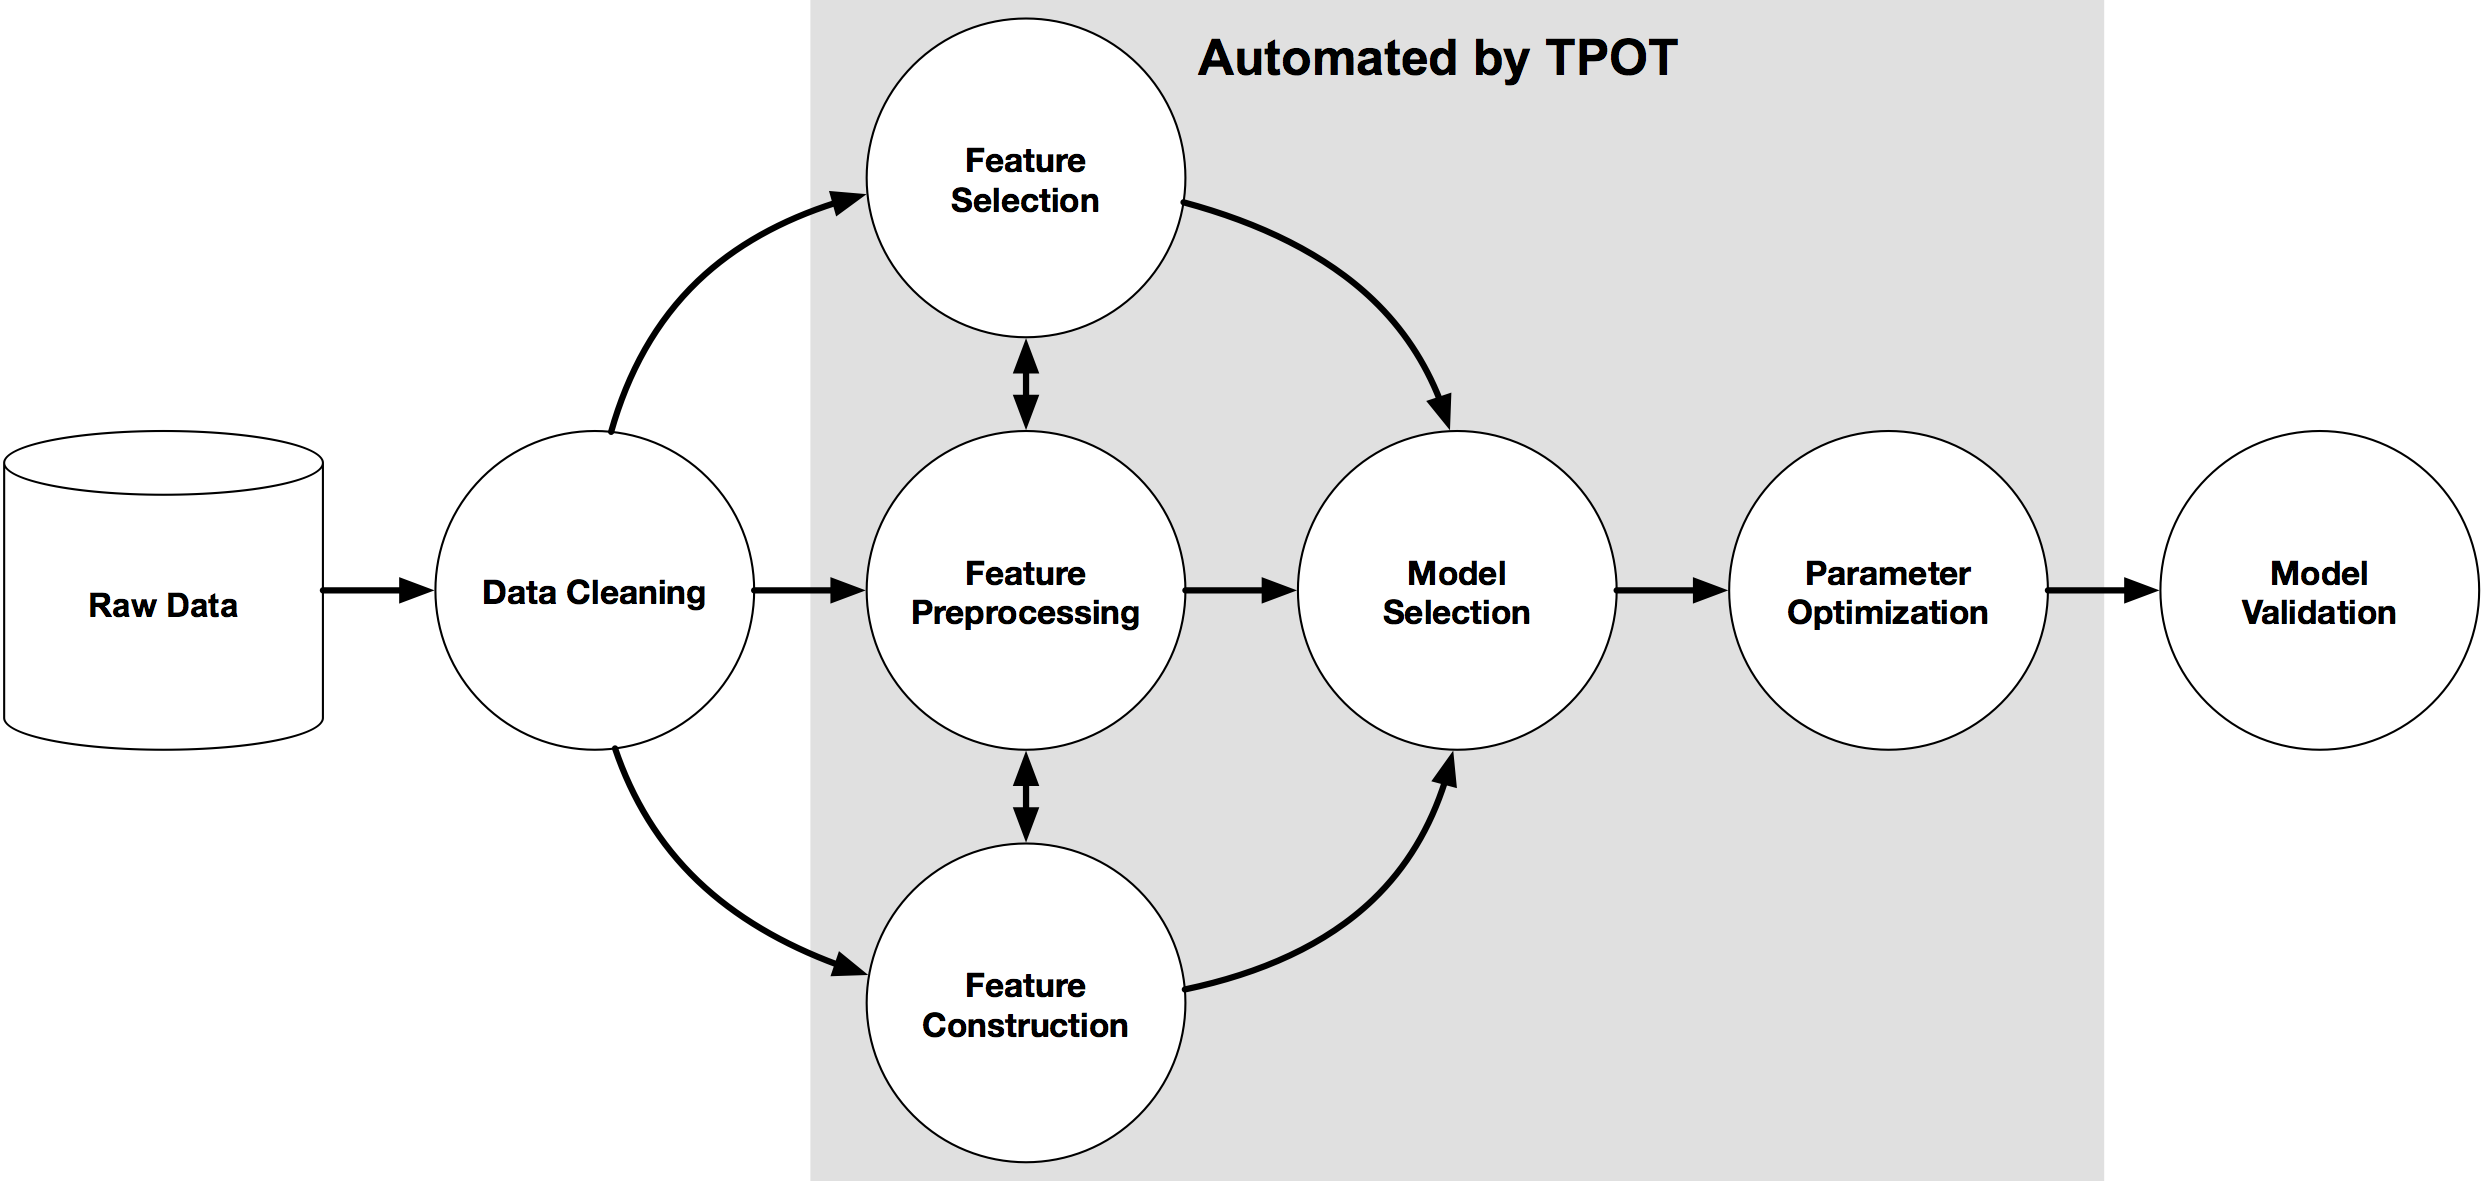

# TPOT Iris

In [139]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')

Generation 1 - Current best internal CV score: 0.9833333333333334
Generation 2 - Current best internal CV score: 0.9833333333333334
Generation 3 - Current best internal CV score: 0.9833333333333334
Generation 4 - Current best internal CV score: 0.9833333333333334
Generation 5 - Current best internal CV score: 0.9833333333333334

Best pipeline: LogisticRegression(input_matrix, C=10.0, dual=False, penalty=l2)
0.9736842105263158


In [140]:
!cat tpot_iris_pipeline.py

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:0.9833333333333334
exported_pipeline = LogisticRegression(C=10.0, dual=False, penalty="l2")

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


## Logistic Comparison

In [138]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
accuracy_score(pred, y_test)

0.9473684210526315

In [132]:
y_test

array([1., 1., 1., 1., 2., 1., 2., 2., 1., 0., 1., 1., 1., 2., 0., 2., 1.,
       2., 2., 0., 0., 1., 2., 2., 0., 1., 0., 1., 1., 2., 0., 0., 0., 0.,
       1., 1., 0., 2.])

# TPOT Boston

In [106]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data.astype(np.float64),
    boston.target.astype(np.float64), train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(-tpot.score(X_test, y_test))
tpot.export('tpot_boston_pipeline.py')

Generation 1 - Current best internal CV score: -11.501075797143846
Generation 2 - Current best internal CV score: -11.501075797143846
Generation 3 - Current best internal CV score: -11.501075797143846
Generation 4 - Current best internal CV score: -10.710139344404812
Generation 5 - Current best internal CV score: -10.710139344404812

Best pipeline: RandomForestRegressor(GradientBoostingRegressor(input_matrix, alpha=0.9, learning_rate=0.1, loss=ls, max_depth=10, max_features=0.8, min_samples_leaf=10, min_samples_split=10, n_estimators=100, subsample=1.0), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=6, min_samples_split=5, n_estimators=100)
-8.519677655231938


In [108]:
!cat tpot_boston_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:-10.710139344404812
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, learning_rate=0.1, loss="ls", max_depth=10, max_features=0.8, min_samples_leaf=10, min_samples_split=10, n_estimators=100, subsample=1.0)),
    RandomForestRegressor(bootstrap=False, max_features

## Random Forest Comparison

In [115]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
mean_absolute_error(pred, y_test)
mean_squared_error(pred, y_test)

9.305768976377955

# TPOT Options
Source:  https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9

## Algorithms
* sklearn.naive_bayes.BernoulliNB: 
 * alpha: [1e-3, 1e-2, 1e-1, 1., 10., 100.]
 * fit_prior: [True, False] }
* sklearn.naive_bayes.MultinomialNB: 
 * alpha: [1e-3, 1e-2, 1e-1, 1., 10., 100.]
 * fit_prior: [True, False]
* sklearn.tree.DecisionTreeClassifier: 
 * criterion: [“gini”, “entropy”]
 * max_depth: range(1, 11)
 * min_samples_split: range(2, 21)
 * min_samples_leaf: range(1, 21)
* sklearn.ensemble.ExtraTreesClassifier: 
 * n_estimators: [100]
 * criterion: [“gini”, “entropy”]
 * max_features: np.arange(0.05, 1.01, 0.05)
 * min_samples_split: range(2, 21)
 * min_samples_leaf: range(1, 21)
 * bootstrap: [True, False]
* sklearn.ensemble.RandomForestClassifier: 
 * n_estimators: [100]
 * criterion: [“gini”, “entropy”]
 * max_features: np.arange(0.05, 1.01, 0.05)
 * min_samples_split: range(2, 21)
 * min_samples_leaf: range(1, 21)
 * bootstrap: [True, False] 
* sklearn.ensemble.GradientBoostingClassifier’:
 * n_estimators’: [100]
 * learning_rate: [1e-3, 1e-2, 1e-1, 0.5, 1.]
 * max_depth: range(1, 11)
 * min_samples_split: range(2, 21)
 * min_samples_leaf: range(1, 21)
 * subsample: np.arange(0.05, 1.01, 0.05)
 * max_features’: np.arange(0.05, 1.01, 0.05)
* sklearn.neighbors.KNeighborsClassifier’:
 * n_neighbors: range(1, 101)
 * weights: [“uniform”, “distance”]
 * pL [1, 2] 
* sklearn.svm.LinearSVC:
 * penalty: [“l1”, “l2”]
 * loss: [“hinge”, “squared_hinge”]
 * dual: [True, False]
 * tol: [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
 * C: [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
* sklearn.linear_model.LogisticRegression:
 * penalty: [“l1”, “l2”]
 * C: [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.]
 * dual: [True, False]
* xgboost.XGBClassifier: 
 * n_estimators: [100]
 * max_depth: range(1, 11)
 * learning_rate: [1e-3, 1e-2, 1e-1, 0.5, 1.]
 * subsample: np.arange(0.05, 1.01, 0.05)
 * min_child_weight: range(1, 21)
 * nthread: [1] 

## Feature Engineering
* sklearn.preprocessing.Binarizer’:
 * threshold’: np.arange(0.0, 1.01, 0.05) 
* sklearn.decomposition.FastICA’:
 * tol: np.arange(0.0, 1.01, 0.05)
* sklearn.cluster.FeatureAgglomeration’:
 * linkage: [‘ward’, ‘complete’, ‘average’]
 * affinity: [‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’, ‘cosine’]
* sklearn.preprocessing.MaxAbsScaler 
* sklearn.preprocessing.MinMaxScaler
* sklearn.preprocessing.Normalizer’
 * ‘norm’: [‘l1’, ‘l2’, ‘max’] 
* sklearn.kernel_approximation.Nystroem:
 * kernel: [‘rbf’, ‘cosine’, ‘chi2’, ‘laplacian’, ‘polynomial’, ‘poly’, ‘linear’, ‘additive_chi2’, ‘sigmoid’], 
 * gamma: np.arange(0.0, 1.01, 0.05)
 * n_components: range(1, 11) 
* sklearn.decomposition.PCA:
 * svd_solver: [‘randomized’]
 * iterated_power: range(1, 11) 
* sklearn.preprocessing.PolynomialFeatures:
 * degree: [2]
 * include_bias: [False]
 * interaction_only: [False] 
* sklearn.kernel_approximation.RBFSampler:
 * gamma: np.arange(0.0, 1.01, 0.05)
* sklearn.preprocessing.RobustScaler
* sklearn.preprocessing.StandardScaler
* tpot.builtins.ZeroCount
* tpot.builtins.OneHotEncoder:
 * minimum_fraction: [0.05, 0.1, 0.15, 0.2, 0.25]
 * sparse’: [False]

# Tips
* Prepare to wait - TPOT has a lot of models to work through
 * Control number of generations & population
 * You can get 2 or more models if not converged
 * TPOT does offer a pause and resume method
* Reproduceability - Randomness
* TPOT has its own OHE
 * < 10 unique values are treated as categorical
 * You can encode your own and feed into TPOT
* TPOT isn't the only place you'll see Genetic Algorithms paired with ML
 * Neural Networks (Nodes & Layers)
* Genetic Algorithms aren't the only Meta-Heuristic

# Context
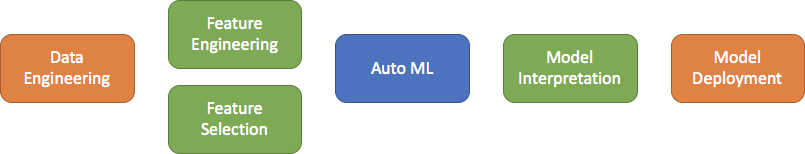